In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [ ]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(housing.data,housing.target,random_state=42)
xtrain,xvalid,ytrain,yvalid=train_test_split(xtrain,ytrain,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)
xvalid=scaler.fit_transform(xvalid)

In [ ]:
xtrain.shape

(11610, 8)

In [ ]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])

In [ ]:
trainedmodel=model.fit(xtrain,ytrain,epochs=20,validation_data=(xvalid,yvalid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3958 - mae: 0.4522 - val_loss: 0.4599 - val_mae: 0.4991
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3931 - mae: 0.4499 - val_loss: 0.4574 - val_mae: 0.4969
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3908 - mae: 0.4486 - val_loss: 0.4556 - val_mae: 0.4936
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3885 - mae: 0.4470 - val_loss: 0.4543 - val_mae: 0.4934
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3869 - mae: 0.4453 - val_loss: 0.4523 - val_mae: 0.4921
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3844 - mae: 0.4443 - val_loss: 0.4467 - val_mae: 0.4835
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3829 - mae: 0.4422 - val_loss: 0.4519 - val_mae: 0.4945
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
maetest=model.evaluate(xtest, ytest)

162/162 [==============================] - 0s 2ms/step - loss: 0.3860 - mae: 0.4519


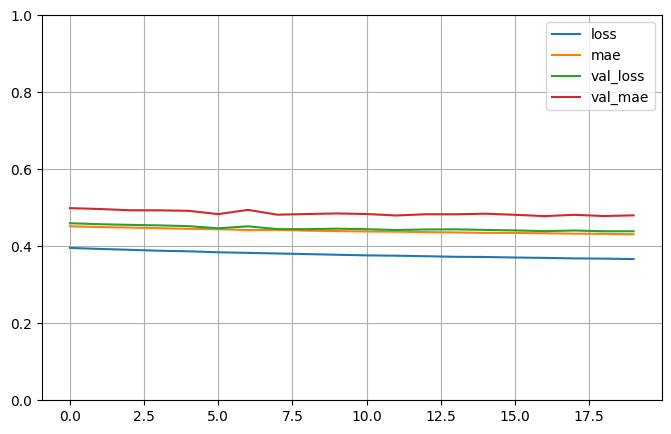

In [ ]:
import pandas as pd
pd.DataFrame(trainedmodel.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
xtest_new=xtest[:3]
y_prob=model.predict(xtest_new)
print(y_prob)
print(ytest[:3])

1/1 [==============================] - 0s 92ms/step
[[0.813883 ]
 [1.7731032]
 [4.5712996]]
[0.477   0.458   5.00001]


In [ ]:
del model
keras.backend.clear_session()

In [ ]:
xtrain.shape

(11610, 8)

In [ ]:
input_=keras.layers.Input(shape=xtrain.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_3[0][0]']            

In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])

In [ ]:
Trained_model=model.fit(xtrain,ytrain,epochs=20,validation_data=(xvalid,yvalid))
maetest=model.evaluate(xtest,ytest)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.7855 - mae: 0.9506 - val_loss: 0.7283 - val_mae: 0.6318
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6717 - mae: 0.6072 - val_loss: 0.6565 - val_mae: 0.5992
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6100 - mae: 0.5736 - val_loss: 0.6092 - val_mae: 0.5748
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5696 - mae: 0.5497 - val_loss: 0.5758 - val_mae: 0.5563
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5381 - mae: 0.5311 - val_loss: 0.5505 - val_mae: 0.5437
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5140 - mae: 0.5166 - val_loss: 0.5347 - val_mae: 0.5384
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4944 - mae: 0.5052 - val_loss: 0.5157 - val_mae: 0.5262
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

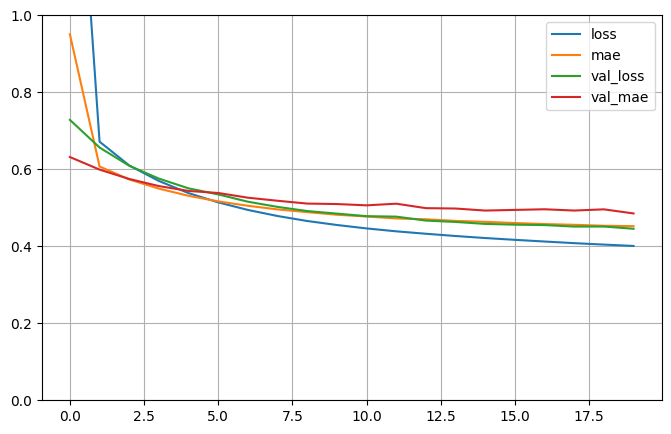

In [ ]:
import pandas as pd
pd.DataFrame(Trained_model.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
maetest

[0.3987649083137512, 0.4594087302684784]

In [ ]:
%pwd

'/content'

In [ ]:
model.save("Housing_Sklearn_FunctionalAPI.h5")

In [ ]:
%cd /content

/content


In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
model=keras.models.load_model("Housing_Sklearn_FunctionalAPI.h5")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_3[0][0]']            

#**Using Callbacks during training**

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(30,activation="relu",input_shape=[8]))
model.add(keras.layers.Dense(30,activation="relu"))
model.add(keras.layers.Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])

In [ ]:
checkpoint=keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [ ]:
history=model.fit(xtrain,ytrain,epochs=10,validation_data=(xvalid,yvalid),callbacks=[checkpoint])

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.2858 - mae: 1.0526 - val_loss: 0.8618 - val_mae: 0.7069
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7721 - mae: 0.6622 - val_loss: 0.7152 - val_mae: 0.6375
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6859 - mae: 0.6123 - val_loss: 0.6613 - val_mae: 0.6015
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6383 - mae: 0.5844 - val_loss: 0.6337 - val_mae: 0.5925
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6018 - mae: 0.5648 - val_loss: 0.6019 - val_mae: 0.5729
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5699 - mae: 0.5481 - val_loss: 0.5805 - val_mae: 0.5642
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5427 - mae: 0.5334 - val_loss: 0.5592 - val_mae: 0.5533
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.

#BEST MODEL ONLY

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])
checkpoint=keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [ ]:
history=model.fit(xtrain,ytrain,epochs=10,validation_data=(xvalid,yvalid),callbacks=[checkpoint])

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.8423 - mae: 0.9877 - val_loss: 0.8401 - val_mae: 0.6708
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7743 - mae: 0.6430 - val_loss: 0.7022 - val_mae: 0.6176
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6884 - mae: 0.6072 - val_loss: 0.6542 - val_mae: 0.5891
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6402 - mae: 0.5844 - val_loss: 0.6290 - val_mae: 0.5835
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6029 - mae: 0.5654 - val_loss: 0.5987 - val_mae: 0.5661
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5695 - mae: 0.5496 - val_loss: 0.5728 - val_mae: 0.5536
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5417 - mae: 0.5347 - val_loss: 0.5503 - val_mae: 0.5409
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
model=keras.models.load_model("Best_Model.h5")
maetest=model.evaluate(xtest,ytest)

162/162 [==============================] - 1s 5ms/step - loss: 0.4455 - mae: 0.4869


#EARLY STOPPING CALLBACK

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])
checkpoint=keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)
earlystop=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [ ]:
history=model.fit(xtrain,ytrain,epochs=200,validation_data=(xvalid,yvalid),callbacks=[checkpoint, earlystop])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 1.8314 - mae: 0.9450 - val_loss: 0.8847 - val_mae: 0.7072
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.8052 - mae: 0.6738 - val_loss: 0.7429 - val_mae: 0.6517
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7053 - mae: 0.6245 - val_loss: 0.6743 - val_mae: 0.6100
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6479 - mae: 0.5922 - val_loss: 0.6369 - val_mae: 0.5946
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6071 - mae: 0.5690 - val_loss: 0.6030 - val_mae: 0.5715
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5754 - mae: 0.5518 - val_loss: 0.5805 - val_mae: 0.5598
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5506 - mae: 0.5373 - val_loss: 0.5610 - val_mae: 0.5498
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - 

In [ ]:
model=keras.models.load_model("early_stop_model.h5")
maetest=model.evaluate(xtest,ytest)

162/162 [==============================] - 1s 1ms/step - loss: 0.3716 - mae: 0.4351


#Different Way to save Early Model

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["mae"])
earlystop=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history=model.fit(xtrain,ytrain,epochs=200,validation_data=(xvalid,yvalid),callbacks=[earlystop])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 2.0021 - mae: 0.9968 - val_loss: 1.1366 - val_mae: 0.7808
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 1.0096 - mae: 0.7498 - val_loss: 0.8839 - val_mae: 0.7155
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.8254 - mae: 0.6868 - val_loss: 0.7524 - val_mae: 0.6553
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.7163 - mae: 0.6352 - val_loss: 0.6782 - val_mae: 0.6247
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6433 - mae: 0.5976 - val_loss: 0.6187 - val_mae: 0.5908
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5924 - mae: 0.5695 - val_loss: 0.5828 - val_mae: 0.5716
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5570 - mae: 0.5482 - val_loss: 0.5545 - val_mae: 0.5555
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - 

In [ ]:
model.save("EarlyModelNewWay.h5")
model=keras.models.load_model("EarlyModelNewWay.h5")
maetest=model.evaluate(xtest,ytest)

162/162 [==============================] - 0s 1ms/step - loss: 0.3681 - mae: 0.4343
